# Q.1.
Work to improve the model performance for the diabetes decision tree we created in
class. You should be able to improve the precision and recall to be above .8 and .7
respectively. You can improve the preprocessing OR alter the model itself.


In [5]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
import matplotlib.pyplot as plt

from IPython.display import Image

diabetes_df = pd.read_csv("../dataset/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [3]:
model = tree.DecisionTreeClassifier(max_depth = 6,random_state=24)


model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       150
           1       0.79      0.57      0.66        81

    accuracy                           0.80       231
   macro avg       0.80      0.74      0.76       231
weighted avg       0.80      0.80      0.79       231



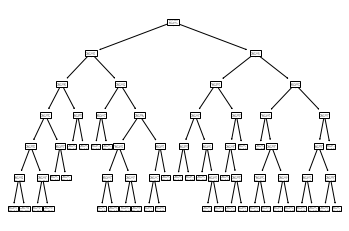

In [6]:
tree.plot_tree(model)
plt.savefig("tree.svg")
plt.show()

# Q. 2.
Create a function that accepts an array of names and returns a string formatted as a list
of names separated by commas EXCEPT for the last two names, which are separated
by an ampersand

In [8]:
names= [{'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}]

def format_names(names):    #start with an empty string; this will be returned as output
    str = ''    #firstm make sure we're not working with an empty list
    if len(names) !=0:        #initialize empty array
        arr = []        #now, we'll iterate over the list:
        for i in range(0, len(names) -1):            #we're going to add to the array the ith name, the value in the key/value pair
            arr.append(names[i]['name'])        #we use the "join" method to add the comma and space after the ith name.
        str = ', '.join(arr)        #Check the condition that the string is not empty, if true, to existing string, add ampersand flanked by spaces, and last name value in list passed to function.
        str += ' & ' + names[-1]['name'] if str != '' else names[-1]['name']    
        return str
        
        
        
format_names(names)        
        
    

'Nichole, Tanisha & Maggie'